In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
import json
import statistics
import matplotlib.ticker as mtick
import os
import glob

julia_plots_colors = [
    "#1f77b4",  # azul
    "#ff7f0e",  # laranja
    "#2ca02c",  # verde
    "#d62728",  # vermelho
    "#9467bd",  # roxo
    "#8c564b",  # marrom
    "#e377c2",  # rosa
    "#7f7f7f",  # cinza
    "#bcbd22",  # verde oliva
    "#17becf"   # ciano
]


In [2]:
denv_path = '../GREAC/benchmark_results_denv_eq.csv'
sars_path = 'benchmark_results_covid_2.csv'
# hiv_path = '../HIV/classify/predictions/'

In [21]:
metric = "kmerset"
for var, path in zip(["SARS-COV"],[sars_path]):
    data = pd.read_csv(path)

    for w in [0.2,0.4,0.6,0.8]:
        filt = data[(data['wndwPercent'] == w)]
        print(f'{var} - window:{w:.3f}')
        print(f'{var} - number of kmers: mean = {filt["kmerset"].mean():.4f} std = ({filt["kmerset"].std():.4f})')
        print(f'{var} - number of windows (features) mean = {filt["windows"].mean():.4f} std = ({filt["windows"].std():.4f})')
        print('-------------------')


SARS-COV - window:0.200
SARS-COV - number of kmers: mean = 639.9700 std = (41.4543)
SARS-COV - number of windows (features) mean = 57.7125 std = (3.2055)
-------------------
SARS-COV - window:0.400
SARS-COV - number of kmers: mean = 634.3625 std = (40.7321)
SARS-COV - number of windows (features) mean = 35.9675 std = (2.6832)
-------------------
SARS-COV - window:0.600
SARS-COV - number of kmers: mean = 634.3050 std = (40.6139)
SARS-COV - number of windows (features) mean = 24.2400 std = (1.9083)
-------------------
SARS-COV - window:0.800
SARS-COV - number of kmers: mean = 634.3050 std = (40.6139)
SARS-COV - number of windows (features) mean = 17.6900 std = (1.5844)
-------------------


In [10]:
denv = pd.read_csv(sars_path)
denv = denv[(denv['wndwPercent'] == 0.8)]
# hiv = pd.read_csv(hiv_path + 'metrics.csv')
denv

,wndwPercent,metric,windows,window_size,max_seq_windows,kmerset,Omicron,Beta,Epsilon,Eta,...,Delta,Kappa,Iota,Alpha,macro_f1,macro_precision,macro_recall,micro_f1,micro_precision,micro_recall
31,0.8,mahalanobis,16,237,29670,673,0.9974,0.2896,0.9182,0.9499,...,0.7323,0.9048,0.9991,0.9961,0.8786,0.8722,0.9561,0.9827,0.9827,0.9827
35,0.8,kld,16,237,29670,673,0.9975,0.2529,0.9675,0.9712,...,0.7187,0.3393,0.9990,0.9998,0.8235,0.8162,0.9540,0.9855,0.9855,0.9855
41,0.8,mahalanobis,17,236,29668,660,0.9939,0.4716,0.9761,1.0000,...,0.9224,0.8276,0.9986,0.9956,0.9162,0.8843,0.9874,0.9902,0.9902,0.9902
44,0.8,kld,17,236,29668,660,0.9877,0.5567,0.9920,0.9952,...,0.8588,0.2857,0.9966,0.9999,0.8488,0.8187,0.9715,0.9900,0.9900,0.9900
47,0.8,manhattan,17,236,29668,638,0.9978,0.8897,0.9850,1.0000,...,0.9669,0.8085,0.9995,0.9999,0.9646,0.9425,0.9949,0.9974,0.9974,0.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,0.8,kld,19,237,29670,657,0.9992,0.8107,0.9945,0.9882,...,0.9842,0.7525,0.9996,0.9999,0.9474,0.9157,0.9954,0.9983,0.9983,0.9983
1475,0.8,manhattan,16,236,29671,584,0.9988,0.9124,0.9860,1.0000,...,0.9748,0.9048,0.9981,1.0000,0.9753,0.9596,0.9943,0.9979,0.9979,0.9979
1479,0.8,euclidian,16,236,29671,584,0.9969,0.9220,0.9822,0.9774,...,0.9633,0.5000,0.9949,0.9997,0.9227,0.8891,0.9905,0.9963,0.9963,0.9963
1483,0.8,mahalanobis,16,236,29671,584,0.9978,0.8087,0.9784,1.0000,...,0.9662,0.8172,0.9971,0.9996,0.9560,0.9316,0.9911,0.9966,0.9966,0.9966


In [11]:
#wndwPercent,metric,windows,kmerset,window_size,max_seq_windows,type3,type1,type4,type2,macro_f1,macro_precision,macro_recall,micro_f1,micro_precision,micro_recall
metrics = ['macro_precision', 'macro_recall', 'macro_f1']

for m in ["manhattan","kld","euclidian","mahalanobis"]:
    dfm = denv[(denv['metric'] == m)]
    for metric in metrics:
        print(f'{m} {metric}: {dfm[metric].mean():.4f},{dfm[metric].std():.4f}')
    print('-------------------')
# for metric in metrics:
#     print(f'HIV {metric}: {hiv[metric].mean():.4f} ({hiv[metric].std():.4f})')
# print('-------------------')

manhattan macro_precision: 0.9402,0.0357
manhattan macro_recall: 0.9940,0.0050
manhattan macro_f1: 0.9587,0.0286
-------------------
kld macro_precision: 0.8755,0.0333
kld macro_recall: 0.9833,0.0117
kld macro_f1: 0.9040,0.0337
-------------------
euclidian macro_precision: 0.8930,0.0343
euclidian macro_recall: 0.9899,0.0074
euclidian macro_f1: 0.9186,0.0310
-------------------
mahalanobis macro_precision: 0.9192,0.0430
mahalanobis macro_recall: 0.9851,0.0138
mahalanobis macro_f1: 0.9376,0.0409
-------------------


In [24]:
folder = '/home/salipe/Desktop/KEVOLVE/output/predictions/' #'bench_out/'

# Lista para armazenar resultados de cada arquivo
results = []

# Percorre todos os arquivos CSV na pasta
for filepath in glob.glob(os.path.join(folder, '*.csv')):
    df = pd.read_csv(filepath)  # se for separado por tabs, use sep='\t'
    
    # Extrai y_true a partir da coluna 'id' (classe após o segundo '|')
    df['y_true'] = df['id'].str.split('|').str[1]
    y_true = df['y_true']
    y_pred = df['y_pred']
    
    # Lista de variantes (classes) presentes
    labels = sorted(pd.unique(y_true))
    p_cls, r_cls, f1_cls, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )
  
    # Calcula métricas macro (média das métricas por classe)
    p_macro, r_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0
    )
    
    # Monta dicionário para este arquivo
    row = {
        'file': os.path.basename(filepath),
        'precision_macro': p_macro,
        'recall_macro': r_macro,
        'f1_macro': f1_macro
    }
    # Adiciona as métricas por classe
    for lbl, p, r, f1 in zip(labels, p_cls, r_cls, f1_cls):
        row[f'precision_{lbl}'] = p
        row[f'recall_{lbl}']    = r
        row[f'f1_{lbl}']        = f1
    
    results.append(row)

# DataFrame com resultados individuais
results_df = pd.DataFrame(results)

# Estatísticas globais (média e desvio padrão) das métricas macro
summary = results_df[['precision_macro', 'recall_macro', 'f1_macro']].agg(['mean', 'std']).T
summary = summary.round(4)

# Salva resultados em CSV
results_df.to_csv('model_metrics_per_file.csv', index=False)
summary.to_csv('macro_metrics_summary.csv')

# Exibe um preview
print("Resultados por arquivo:")
print(results_df.head(), end='\n\n')
print("Média e desvio padrão das métricas macro:")
print(summary)


Resultados por arquivo:
              file  precision_macro  recall_macro  f1_macro  precision_type1  \
0  prediction1.csv         0.976123      0.995647  0.985462         0.997759   
1  prediction2.csv         0.984506      0.996260  0.990254         0.999102   
2  prediction3.csv         0.972403      0.995313  0.983288         0.999101   
3  prediction4.csv         0.973390      0.994986  0.983688         0.999102   
4  prediction5.csv         0.984673      0.995818  0.990128         0.999101   

   recall_type1  f1_type1  precision_type2  recall_type2  f1_type2  \
0      0.990654  0.994194         0.999300      0.997207  0.998252   
1      0.990654  0.994860         0.999301      0.998603  0.998952   
2      0.989319  0.994186         0.999300      0.997207  0.998252   
3      0.989764  0.994411         0.999300      0.996508  0.997902   
4      0.988874  0.993961         0.999300      0.996508  0.997902   

   precision_type3  recall_type3  f1_type3  precision_type4  recall_type4 

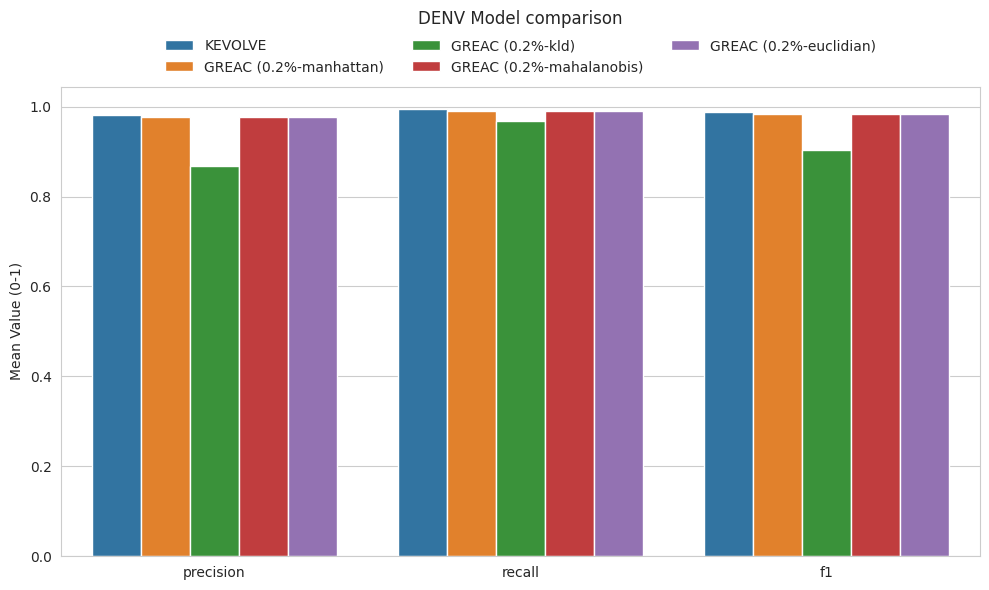

In [29]:
csv_path = 'denv_resultados_comparacao_modelos.csv'
metrics = ['precision', 'recall', 'f1']
plot_data = []
df = pd.read_csv(csv_path)
for metric in metrics:
    for idx, row in df.iterrows():
        plot_data.append({
            'model': row['modelo'],
            'metric': metric,
            'mean': row[f'{metric}_mean'],
            'std': row[f'{metric}_std']
        })

plot_df = pd.DataFrame(plot_data)

sns.set_style("whitegrid")
modelos_unicos = plot_df['model'].unique()
palette = {modelo: julia_plots_colors[i % len(julia_plots_colors)] for i, modelo in enumerate(modelos_unicos)}

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=plot_df, x='metric', y='mean', hue='model',
                       palette=palette,
                       capsize=0.1)

# for container in barplot.containers:
#     for bar in container:
#         height = bar.get_height()
#         # Get model and metric from plot_df
#         idx = list(barplot.containers).index(container)
#         bars_in_group = len(container)
#         bar_index = list(container).index(bar)
#         row = plot_df.iloc[bar_index + bars_in_group * idx]
#         label = f"{row['mean']:.2f} ± {row['std']:.2f}"
#         barplot.text(
#             bar.get_x() + bar.get_width() / 2,
#             height + 0.01,
#             label,
#             ha='center',
#             va='bottom',
#             fontsize=9
#         )

# Estética
plt.title('DENV Model comparison',pad=45)
plt.ylabel('Mean Value (0-1)')
plt.xlabel('')
plt.legend(title='Models (window size - measure)')
plt.tight_layout()
plt.legend(
        loc="lower center",
        bbox_to_anchor=(0.5, 1),  # just above the plotting area
        ncol=3,
        frameon=False
    )
plt.savefig('denv_metric_comparison.pdf', format="pdf")
plt.show()
plt.close()

In [8]:
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 300


df = pd.read_csv(sars_path)

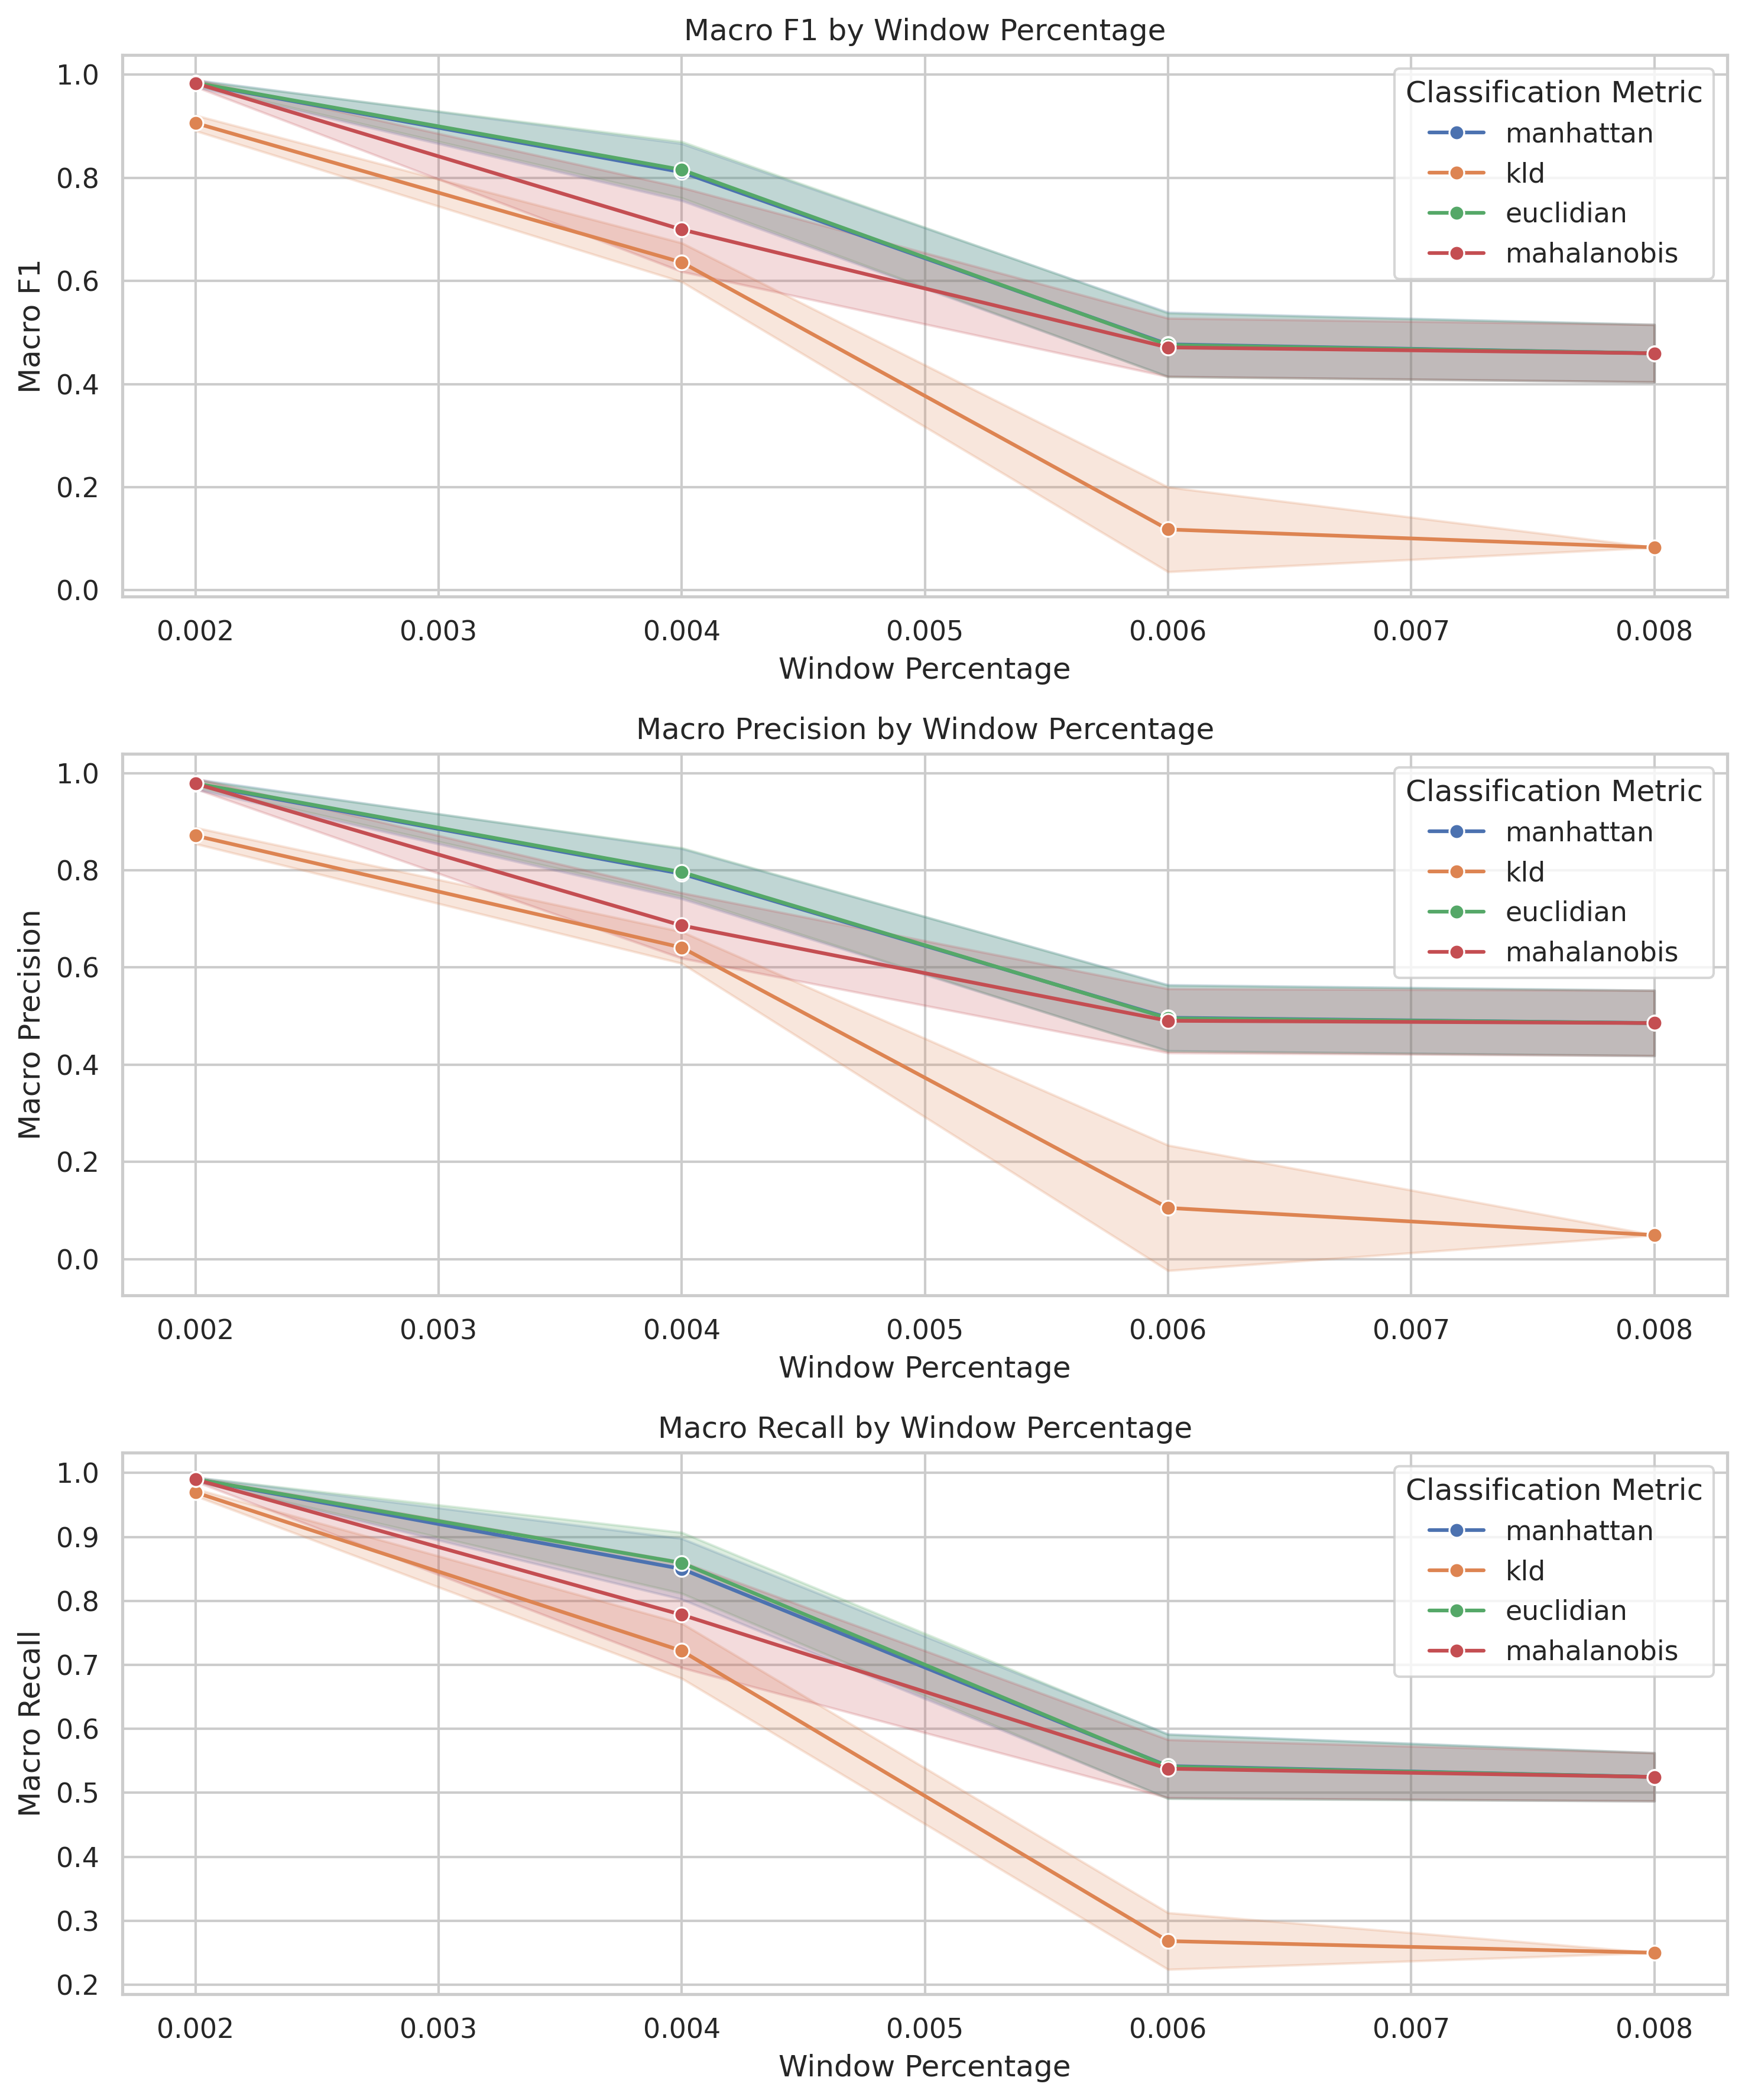

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for ax, metric in zip(axes, ['macro_f1', 'macro_precision', 'macro_recall']):
    sns.lineplot(data=df, x='wndwPercent', y=metric, hue='metric', ax=ax, 
                errorbar='sd', estimator='mean', marker='o')
    ax.set_title(f"{' '.join(metric.split('_')).title()} by Window Percentage")
    ax.set_xlabel("Window Percentage")
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.legend(title='Classification Metric')
plt.tight_layout()
plt.show()

#### 2. Metric Comparison Boxplot

In [28]:
for var, path in zip(["DENV", "SARS-CoV"], [denv_path, sars_path]):
    # 1) load data
    df = pd.read_csv(path)
    
    # 2) create a new figure & axis for this virus
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.set_style("whitegrid")
    
    # 3) violinplot of macro_f1 by window percentage & metric
    sns.violinplot(
        data=df,
        x="wndwPercent",
        y="macro_f1",
        hue="metric",
        split=False,
        ax=ax
    )
    
    # 4) title and axis labels
    ax.set_title(f"{var}: Metric Comparison per Window Size", pad=35)
    ax.set_xlabel("Window Size (%)")
    ax.set_ylabel("Macro F1 Score")
    
    # 5) legend below title, centered
    ncol = df["metric"].nunique()
    ax.legend(
        loc="lower center",
        bbox_to_anchor=(0.5, 1),  # just above the plotting area
        ncol=ncol,
        frameon=False
    )
    
    # 6) tighten layout and save as PDF
    fig.tight_layout()
    fig.savefig(f"{var}_metric_comparison.pdf")
    plt.close(fig)


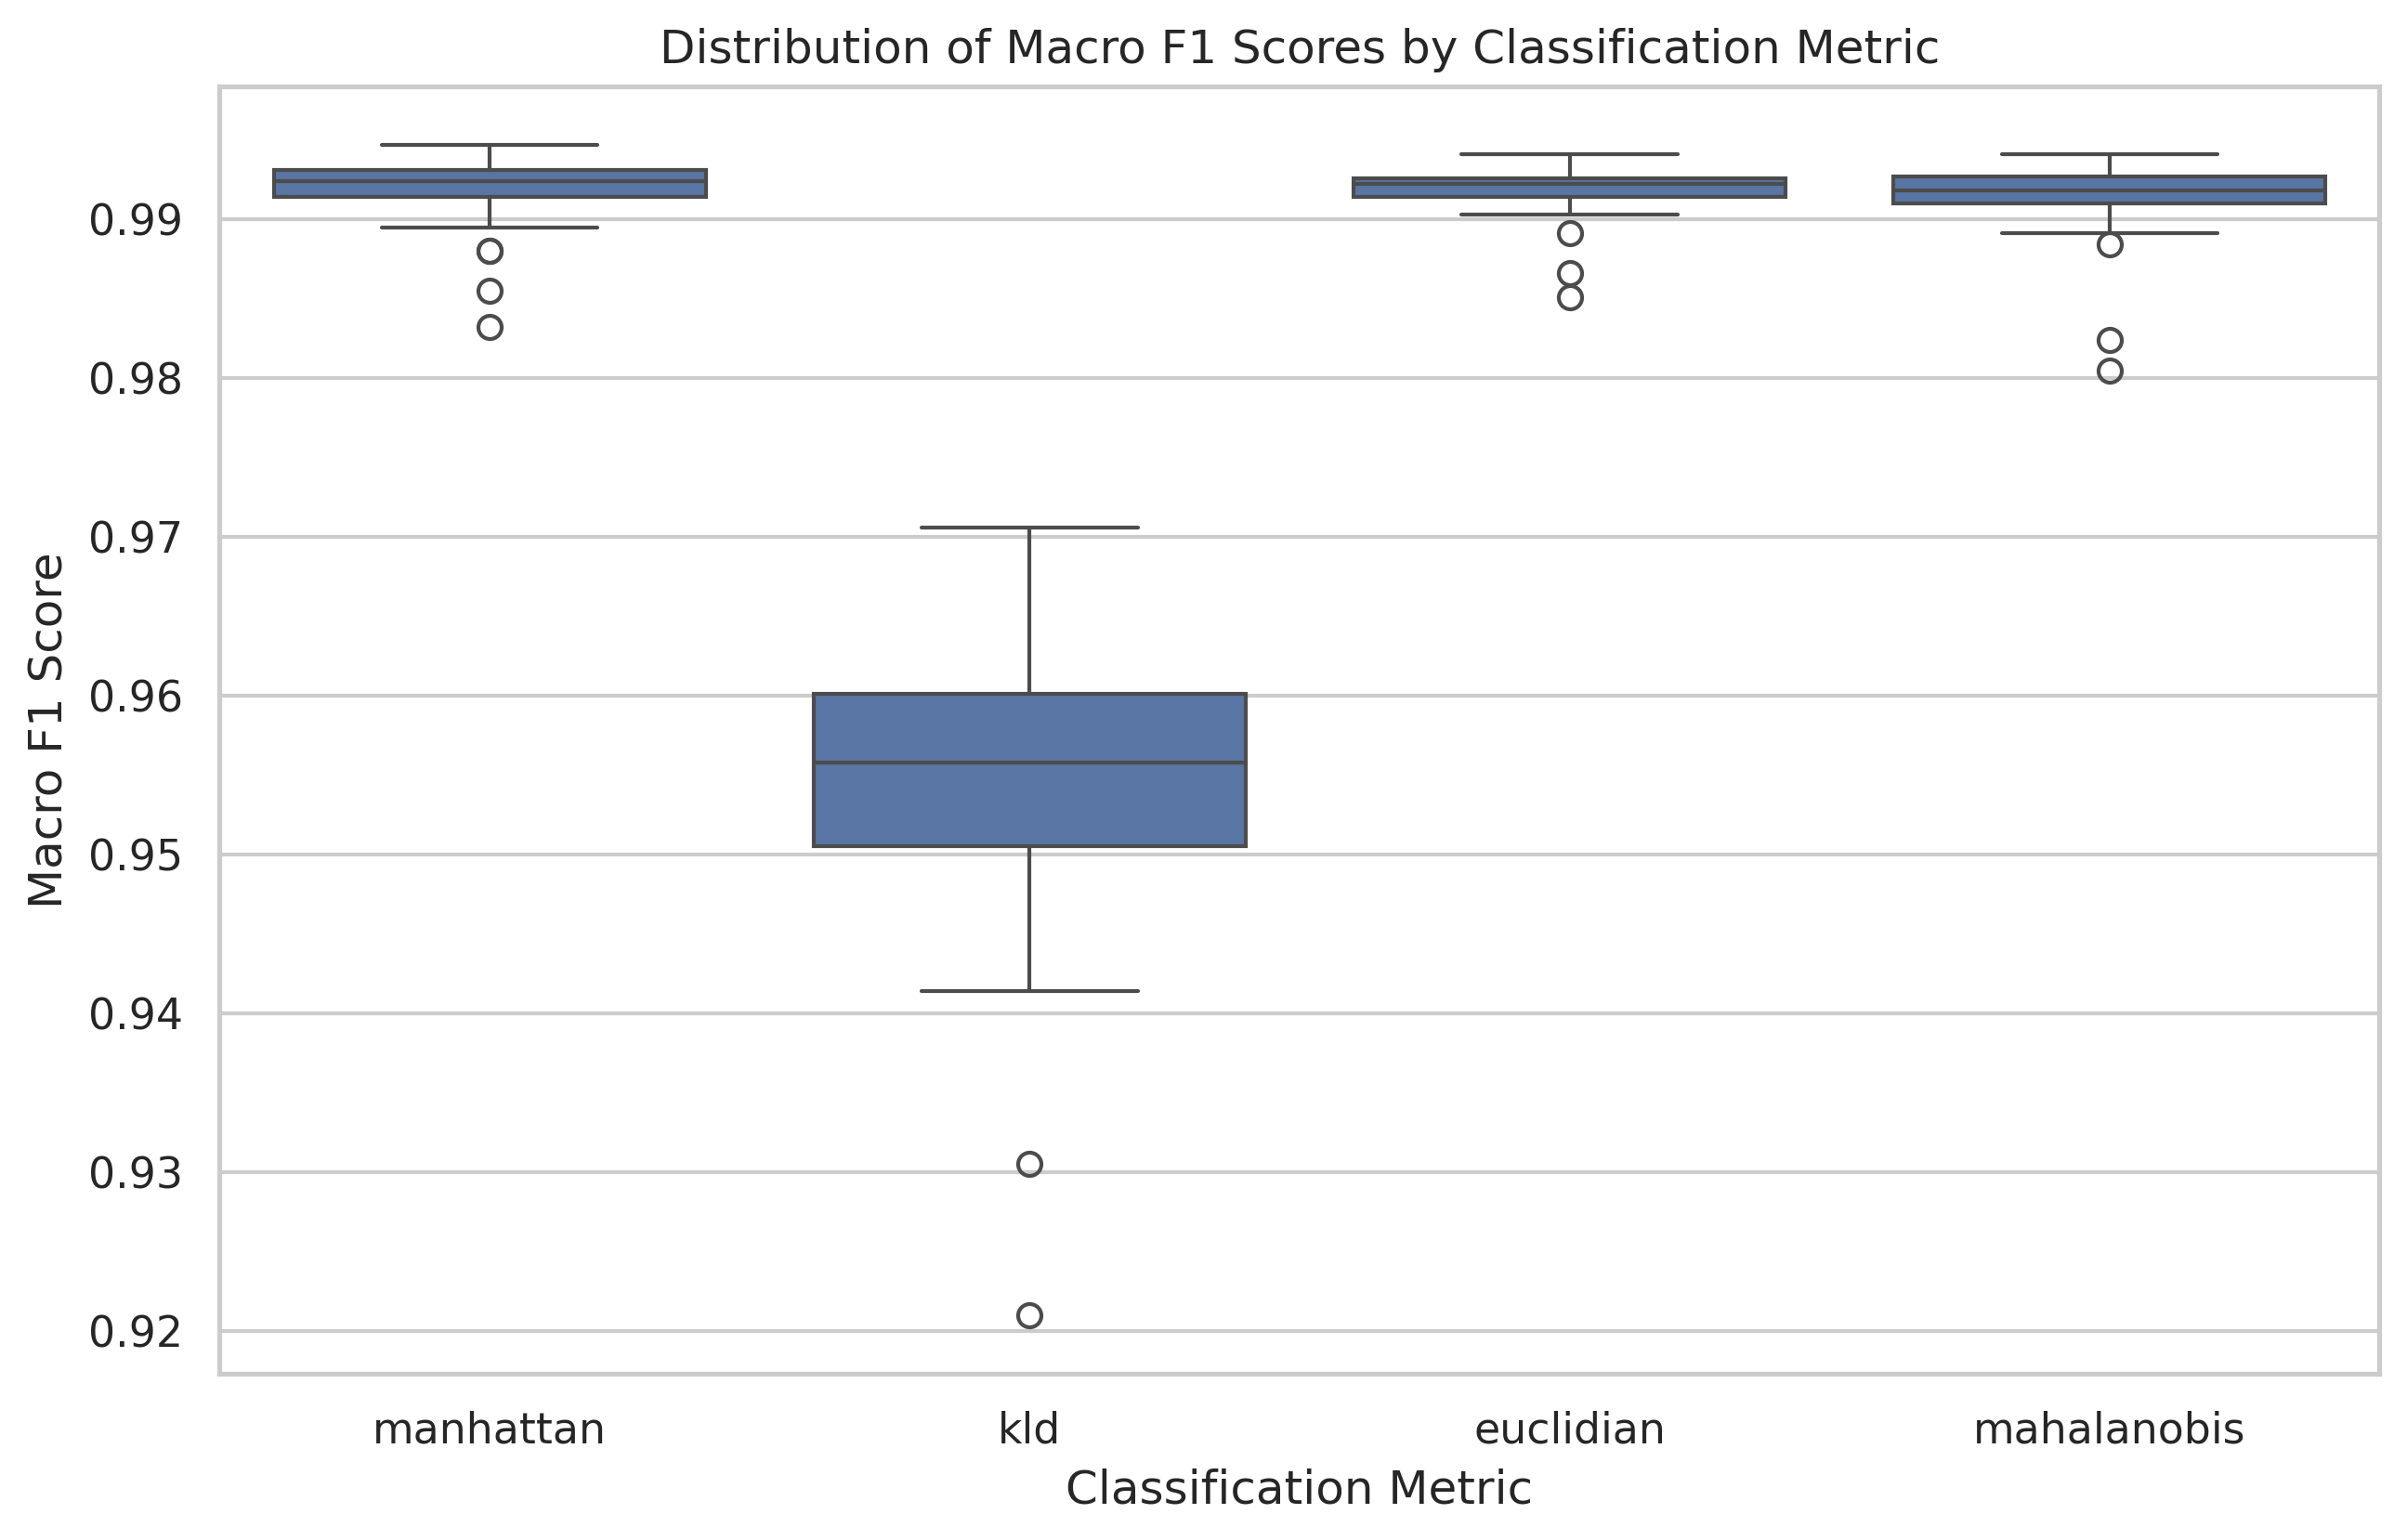

In [6]:
denv = df[(df['wndwPercent'] == 0.002)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=denv, x='metric', y='micro_f1')
plt.title("Distribution of Macro F1 Scores by Classification Metric")
plt.xlabel("Classification Metric")
plt.ylabel("Macro F1 Score")
plt.show()

#### 3. Feature Count Analysis

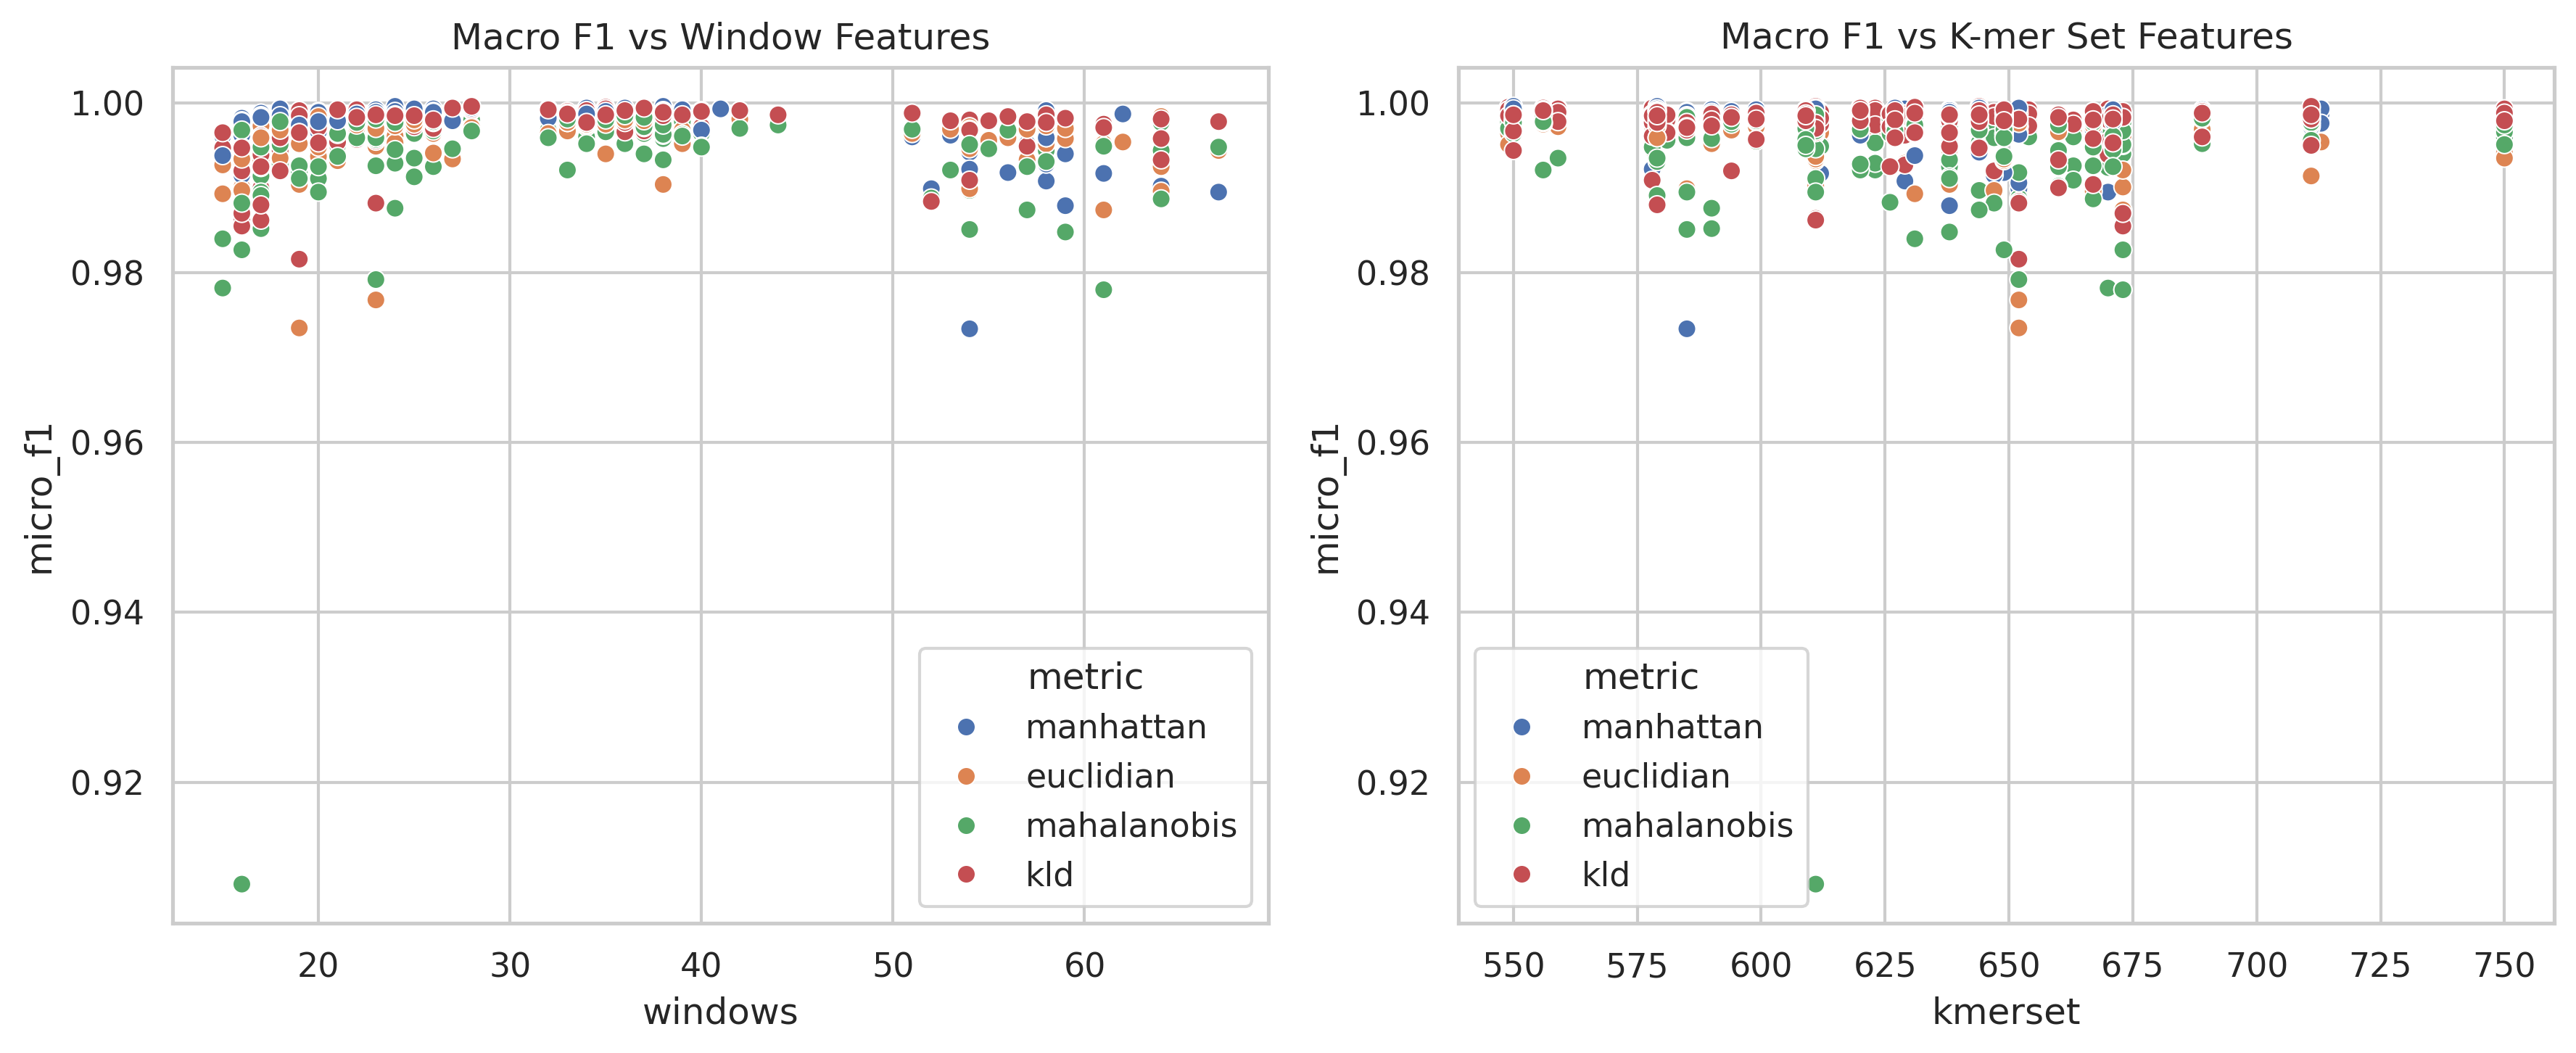

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='windows', y='micro_f1', hue='metric', ax=axes[0])
axes[0].set_title("Macro F1 vs Window Features")
sns.scatterplot(data=df, x='kmerset', y='micro_f1', hue='metric', ax=axes[1])
axes[1].set_title("Macro F1 vs K-mer Set Features")
plt.tight_layout()
plt.show()

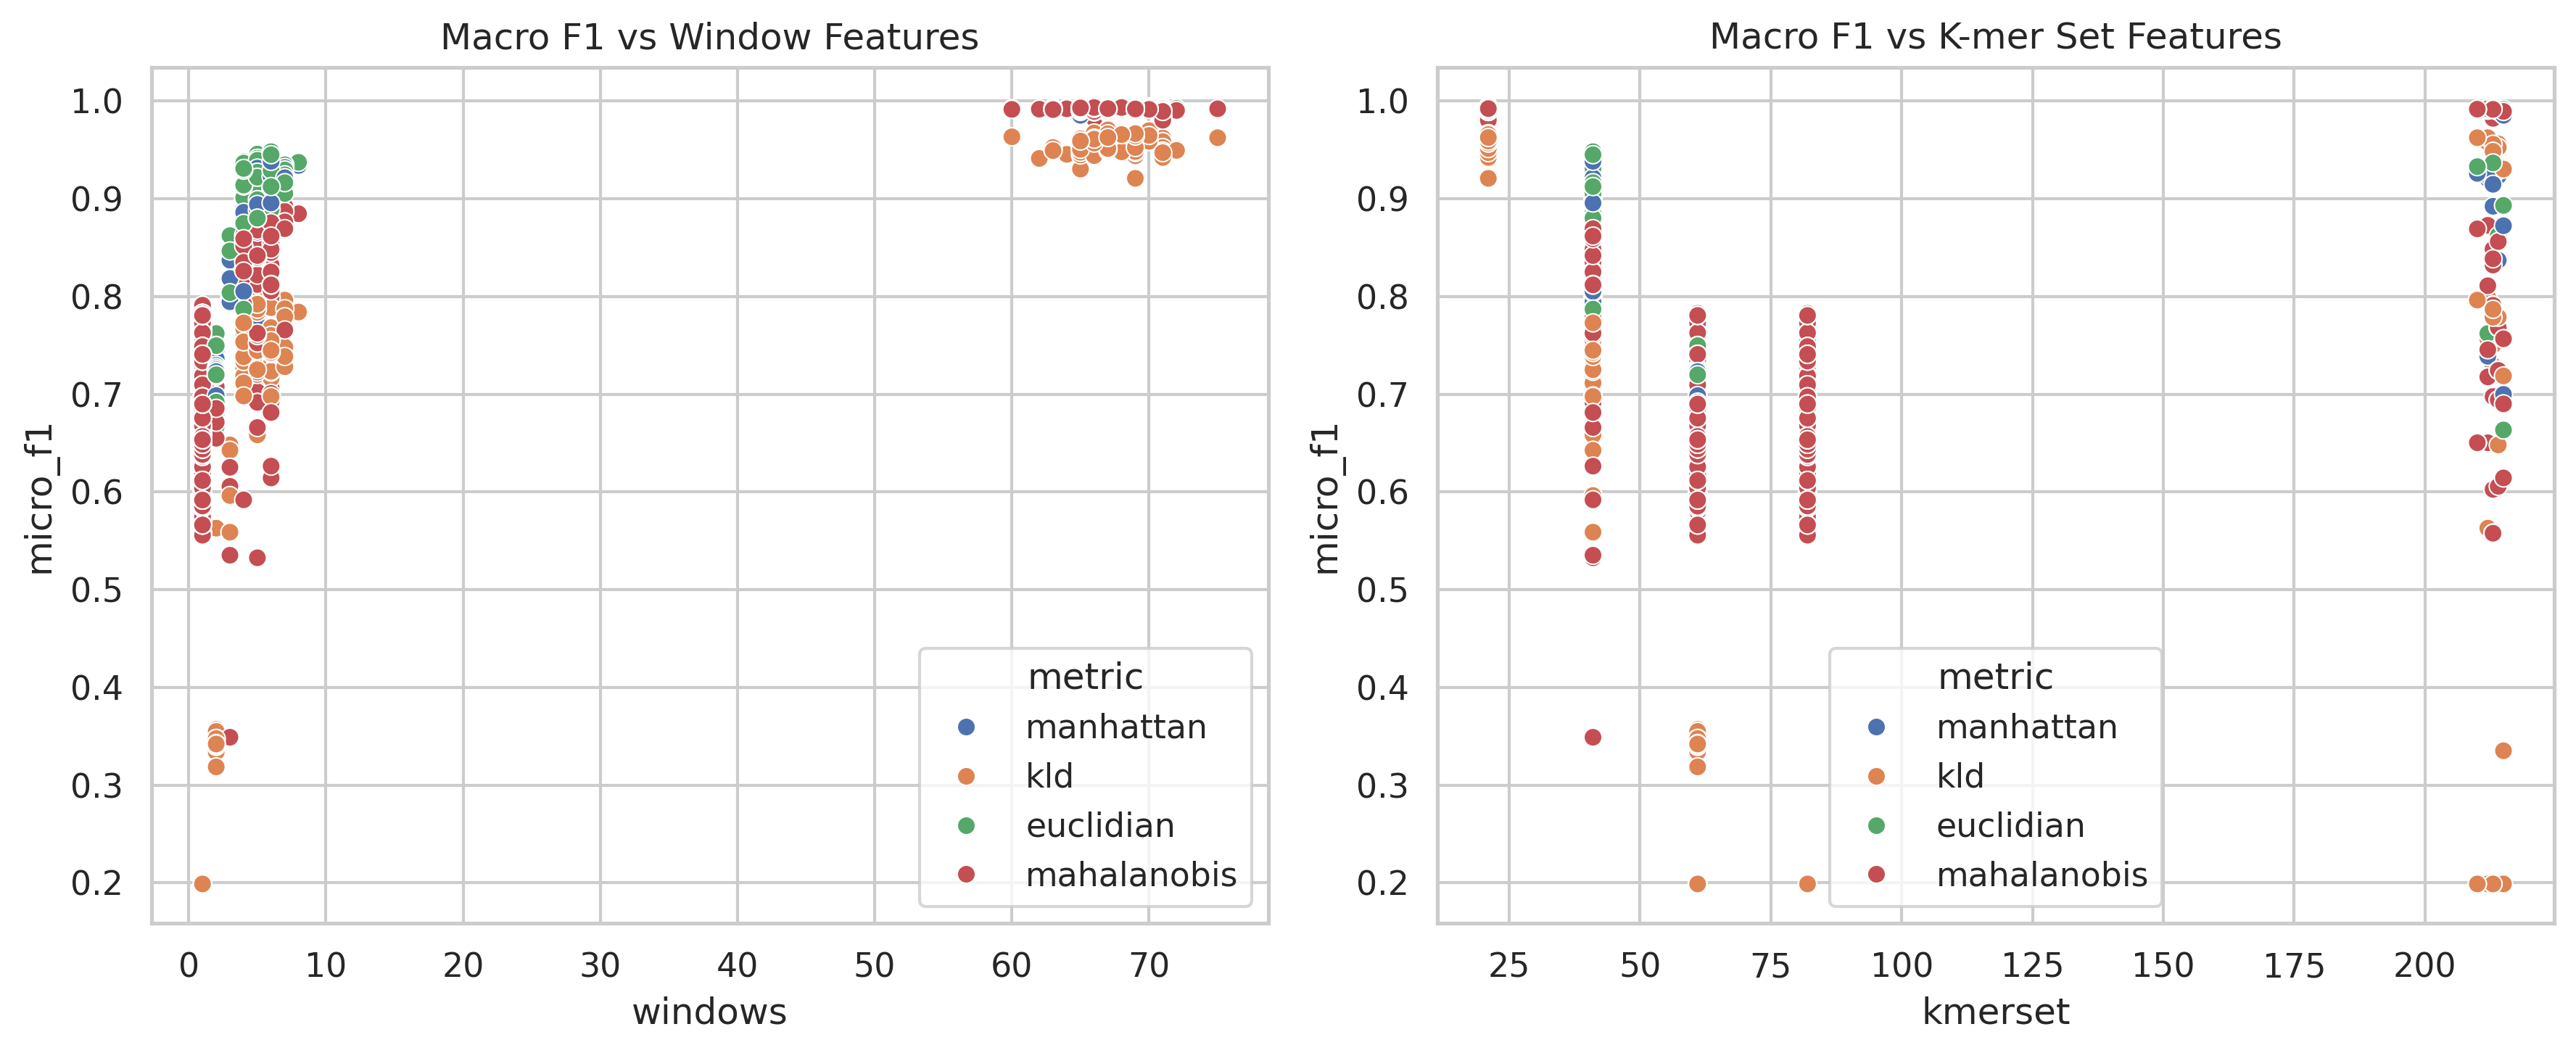

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='windows', y='micro_f1', hue='metric', ax=axes[0])
axes[0].set_title("Macro F1 vs Window Features")
sns.scatterplot(data=df, x='kmerset', y='micro_f1', hue='metric', ax=axes[1])
axes[1].set_title("Macro F1 vs K-mer Set Features")
plt.tight_layout()
plt.show()

#### 4. Per-Class F1 Analysis

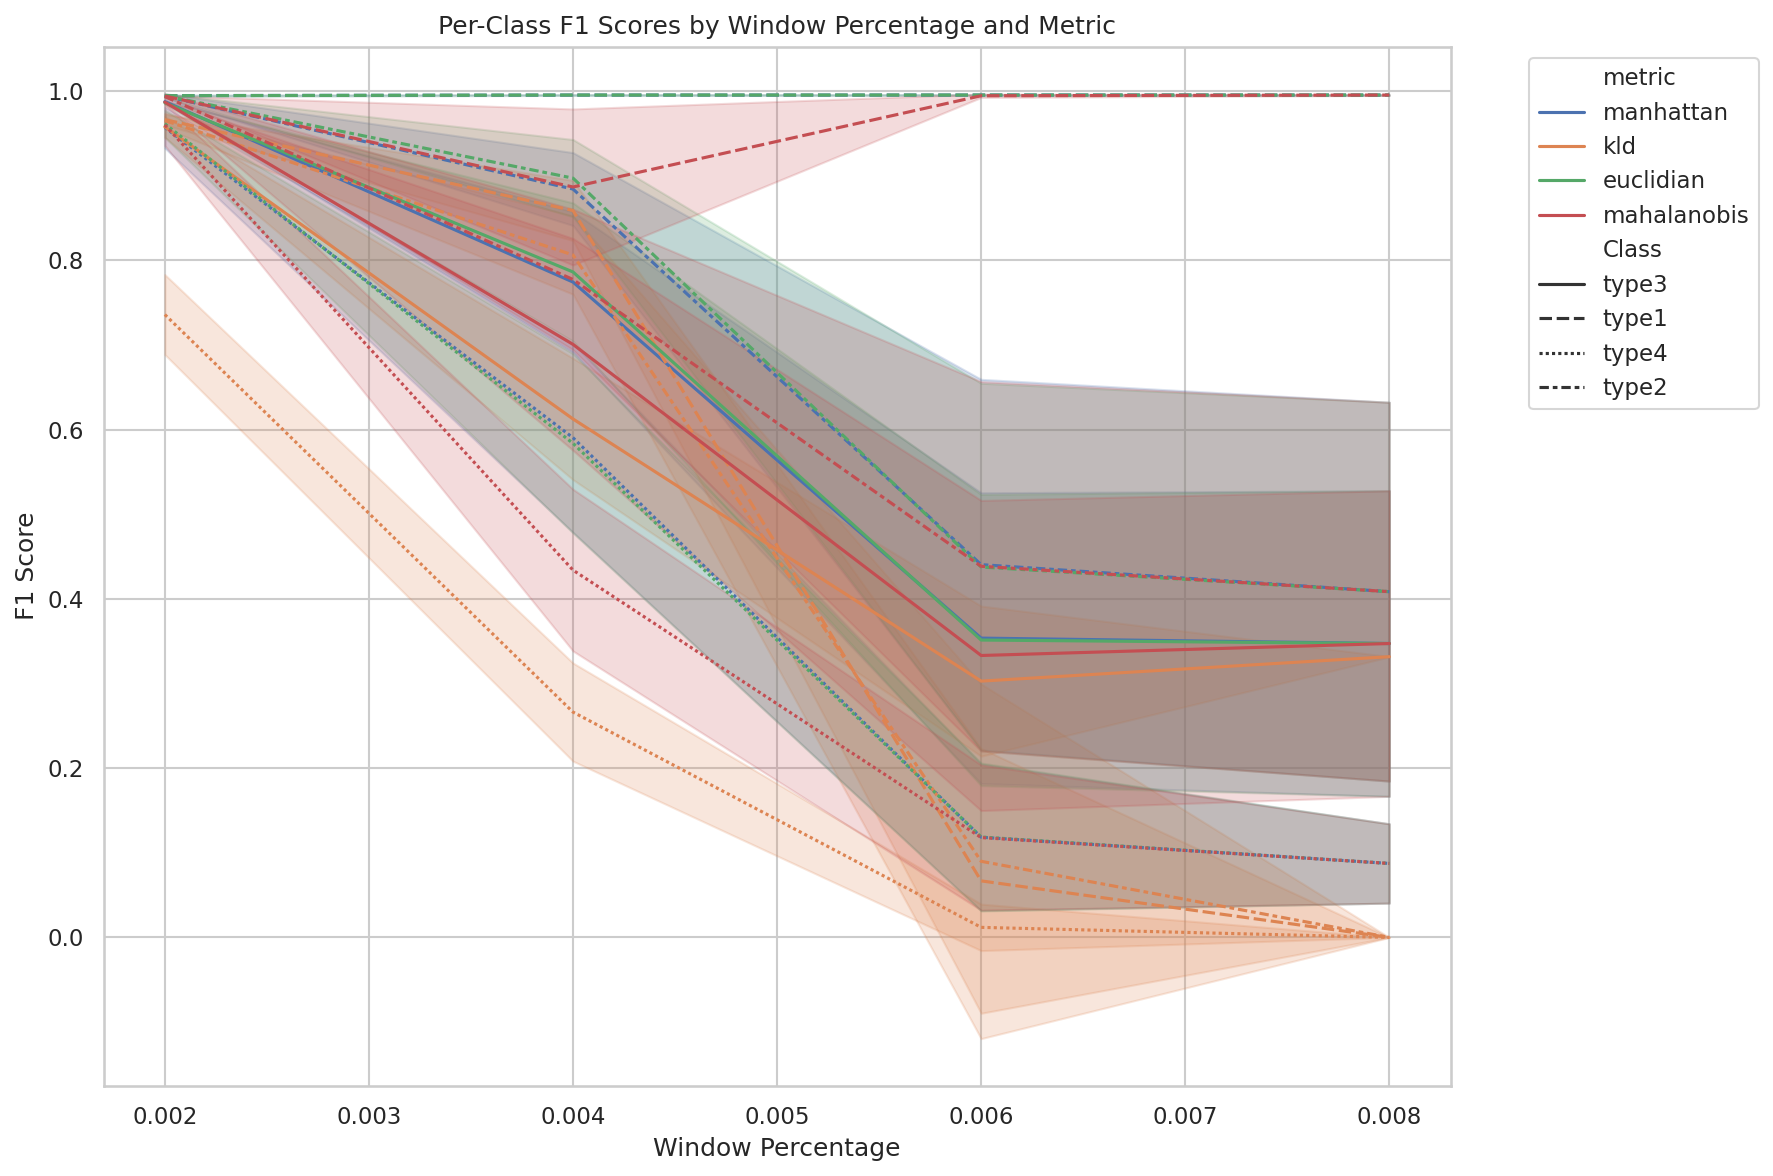

In [11]:

class_columns = [c for c in df.columns if c.startswith('type')]
df_melted = df.melt(
    id_vars=['wndwPercent', 'metric'],
    value_vars=class_columns,
    var_name='Class',
    value_name='F1_Score'
)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='wndwPercent', y='F1_Score', hue='metric', 
            style='Class', errorbar='sd', estimator='mean')
plt.title("Per-Class F1 Scores by Window Percentage and Metric")
plt.xlabel("Window Percentage")
plt.ylabel("F1 Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 5. Summary Tables

In [12]:

print("\nAverage Metrics by Window Percentage and Classification Metric:")
summary_table = df.groupby(['wndwPercent', 'metric']).agg({
    'macro_f1': ['mean', 'std'],
    'macro_precision': ['mean', 'std'],
    'macro_recall': ['mean', 'std'],
    'windows': 'mean',
    'kmerset': 'mean'
}).round(3)
print(summary_table.to_string())


Average Metrics by Window Percentage and Classification Metric:
                        macro_f1        macro_precision        macro_recall        windows kmerset
                            mean    std            mean    std         mean    std    mean    mean
wndwPercent metric                                                                                
0.002       euclidian      0.984  0.004           0.979  0.007        0.990  0.003   67.27   40.19
            kld            0.906  0.015           0.871  0.017        0.970  0.005   67.27   40.19
            mahalanobis    0.984  0.007           0.978  0.011        0.990  0.003   67.27   40.19
            manhattan      0.983  0.007           0.977  0.010        0.990  0.003   67.27   40.19
0.004       euclidian      0.816  0.055           0.796  0.050        0.859  0.048    5.07   58.19
            kld            0.636  0.038           0.641  0.033        0.722  0.043    5.07   58.19
            mahalanobis    0.700  0.082     

#### 6. Correlation Analysis

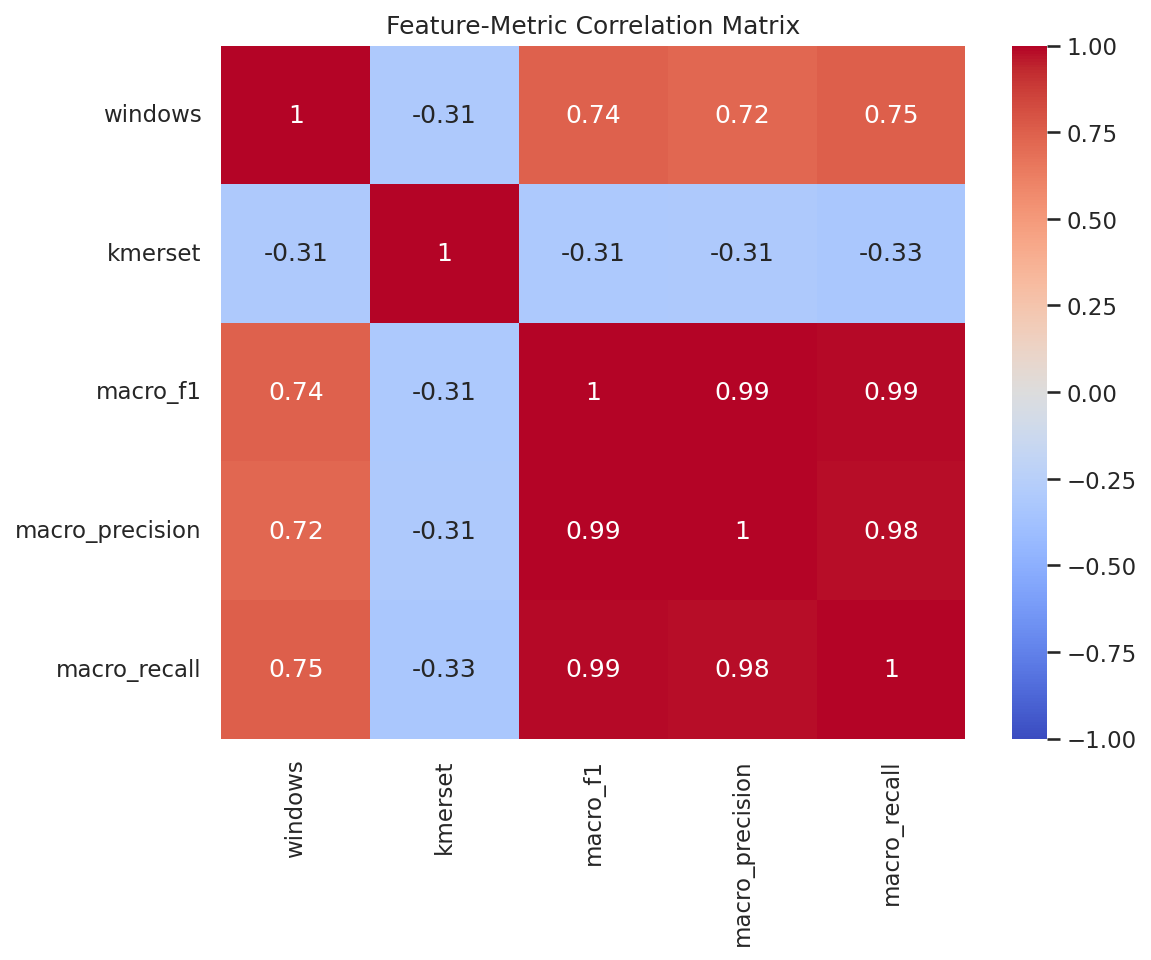

In [13]:

corr_matrix = df[['windows', 'kmerset', 'macro_f1', 'macro_precision', 'macro_recall']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature-Metric Correlation Matrix")
plt.show()

---

In [6]:
def computeConfusionMatrix(tool, n):
    print("Compute confusion matrices for " + tool + "_" + str(n) + "...")

    matrices = {}
    df = pd.read_csv(tool + "/" + "predict_data_" + str(n) + ".csv")
    
    y_pred = df["Predicted"].str.split('_').str[0]
    y_true = df["ID"].str.split('_').str[0]

    confusion_matrix_matrix_pred = confusion_matrix(y_true, y_pred, normalize="pred")

    matrices["confusion_matrix_matrix_pred"] = confusion_matrix_matrix_pred.tolist()

    save_path = tool + "/confusion_matrix/" + tool.split('/')[1] + "_" + str(n) + "_confusion_matrix_matrix_pred.json"
    with open(save_path, "w") as outfile:
        json.dump(matrices["confusion_matrix_matrix_pred"], outfile)

In [8]:
# file_names = ["word9_RF", "word9_SVM", "word15_RF", "word15_SVM"]
file_names = [denv_path]
for file in file_names:
    for n in range(1,101):
        computeConfusionMatrix(file, n)


Compute confusion matrices for ../GREAC/benchmark_results__1...


FileNotFoundError: [Errno 2] No such file or directory: '../GREAC/benchmark_results_/predict_data_1.csv'

In [21]:
hiv_metric = []
hiv_mean = []
hiv_standard_deviation = []

for n in range(1, 101): 
    with open(hiv_path + "/confusion_matrix/HIV_" + str(n) + "_confusion_matrix_matrix_pred.json") as data:
        hiv_metric.append(np.asarray(json.load(data)))

for i in range(0, 25):
    data = []
    for j in range(0, 25):
        data.append(hiv_metric[j].flatten()[i]) 
    hiv_mean.append(round(statistics.mean(data) * 100, 2))
    hiv_standard_deviation.append(round(statistics.stdev(data)*100, 2))
hiv_mean = np.asarray(hiv_mean).reshape(5,5)
hiv_standard_deviation = np.asarray(hiv_standard_deviation).reshape(5,5)

hiv_combined = [f"{i}\n± {j}" for i, j in zip(hiv_mean.flatten(), hiv_standard_deviation.flatten())]
hiv_combined = np.asarray(hiv_combined).reshape(5,5)

In [11]:
denv_metric = []
denv_mean = []
denv_standard_deviation = []

for n in range(1, 101): 
    with open(denv_path + "/confusion_matrix/DENV_" + str(n) + "_confusion_matrix_matrix_pred.json") as data:
        denv_metric.append(np.asarray(json.load(data)))

for i in range(0, 16):
    data = []
    for j in range(0, 16):
        data.append(denv_metric[j].flatten()[i]) 
    denv_mean.append(round(statistics.mean(data) * 100, 2))
    denv_standard_deviation.append(round(statistics.stdev(data)*100, 2))
denv_mean = np.asarray(denv_mean).reshape(4,4)
denv_standard_deviation = np.asarray(denv_standard_deviation).reshape(4,4)

denv_combined = [f"{i}\n± {j}" for i, j in zip(denv_mean.flatten(), denv_standard_deviation.flatten())]
denv_combined = np.asarray(denv_combined).reshape(4,4)

In [12]:
from math import sqrt
from operator import truediv
def get_metrics_from_conf_matrix(conf_mat):
    TP = np.diag(conf_mat)
    FP = conf_mat.sum(axis=0) - TP
    FN = conf_mat.sum(axis=1) - TP
    
    TN = conf_mat.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensibilidade, taxa de acerto, recall ou taxa de true positive 
    TPR = list(map(truediv,TP,(TP+FN)))
    m_TPR = np.mean(TPR)
    print("Sensibilidade Recall:\t", m_TPR)
    
    # Especificidade ou taxa de true negative
    TNR = TN/(TN+FP) 
    m_TNR = np.mean(TNR)
    print("True Negative:\t", m_TNR)
    
    # Precisao
    PPV = list(map(truediv,TP,(TP+FP)))
    m_PPV = np.mean(PPV)
    print("Precisão:\t", m_PPV)
    
    # Predicao negativa
    NPV = TN/(TN+FN)
    m_NPV = np.mean(NPV)
    print("Pred. Negativa:\t", m_NPV)
    # False positive
    FPR = FP/(FP+TN)
    m_FPR = np.mean(FPR)
    print("False Positive: ", m_FPR)
    # False negative
    FNR = FN/(TP+FN)
    m_FNR = np.mean(FNR)
    print("False Negative:\t", m_FNR)
    # False discovery
    FDR = FP/(TP+FP)
    m_FDR = np.mean(FDR)
    print("F Discovery:\t", m_FDR)
    # Accuracy for each class
    ACC = list(map(truediv,(TP+TN),(TP+FP+FN+TN)))
    m_ACC = np.mean(ACC)
    print("Acurácia:\t", m_ACC)

    x = (m_TPR + m_FPR) * (m_TPR + m_FNR) * (m_TNR + m_FPR) * (m_TNR + m_FNR)
    mcc = ((m_TPR * m_TNR) - (m_FPR * m_FNR)) / sqrt(x)

    f1 = 2 * ((m_PPV * m_TPR) / (m_PPV + m_TPR))
    print("F1:\t", f1)
    print("MCC:\t", mcc)
    return m_ACC, f1, m_TPR, m_PPV, mcc


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

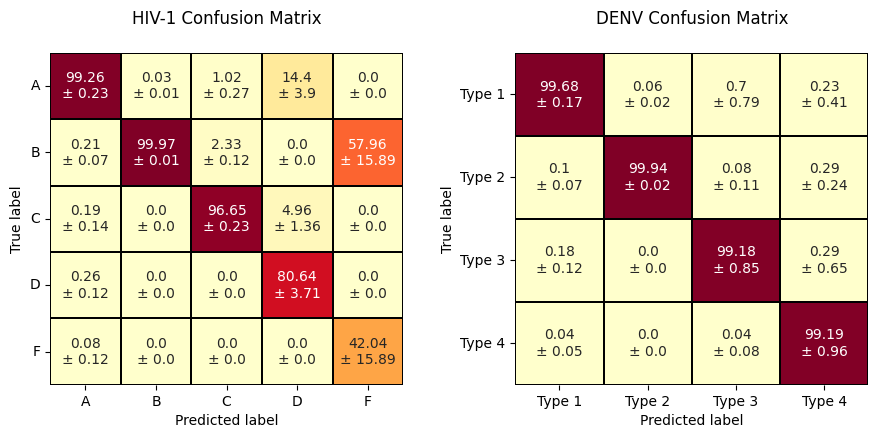

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=5.0)

classes_hiv = ["A", "B", "C", "D", "F"]
classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']

sns.heatmap(ax=axes[0],
            data=hiv_mean,
            annot=hiv_combined,
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)
sns.heatmap(ax=axes[1],
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

# Titles
axes[0].set_title("HIV-1 Confusion Matrix\n")
axes[1].set_title("DENV Confusion Matrix\n")

# X ticks labels
axes[0].set_xticklabels(["A", "B", "C", "D", "F"])
axes[1].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# X and Y Labels
axes[0].set_ylabel("True label")
axes[0].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xlabel("Predicted label")

# Y ticks labels
axes[0].yaxis.set_ticklabels(["A", "B", "C", "D", "F"], rotation=0)
axes[1].yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

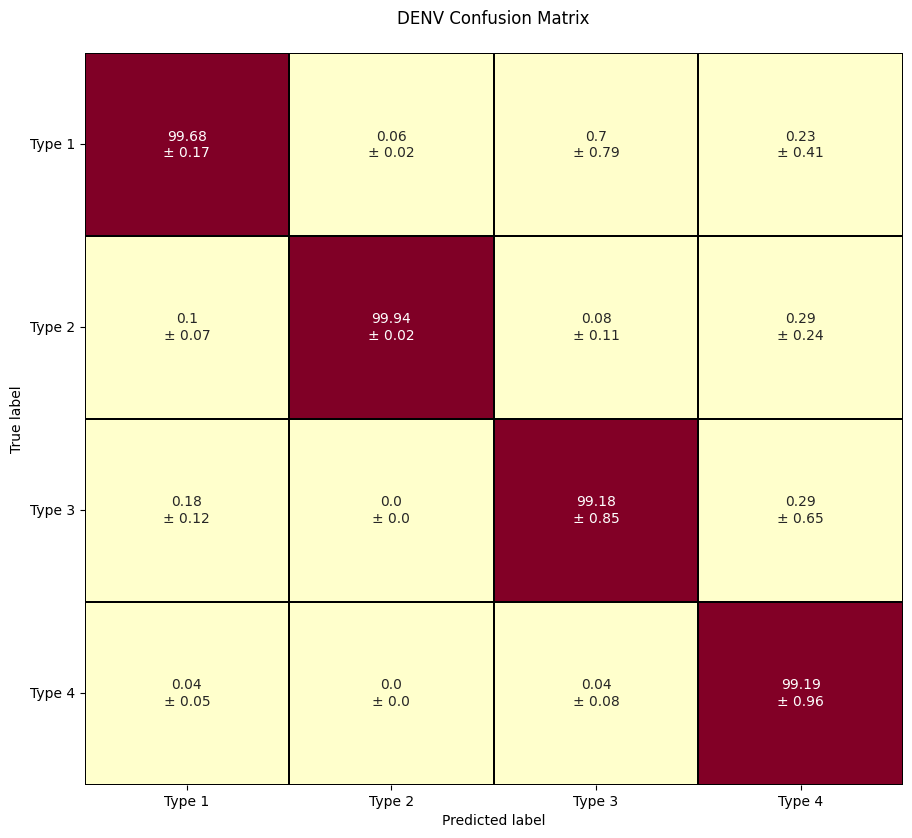

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(10,9))
fig.tight_layout(pad=5.0)

classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']


sns.heatmap(ax=axes,
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

# Titles
axes.set_title("DENV Confusion Matrix\n")

# X ticks labels
axes.set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# X and Y Labels
axes.set_ylabel("True label")
axes.set_xlabel("Predicted label")

# Y ticks labels
axes.yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)


(0.4, 1.0)

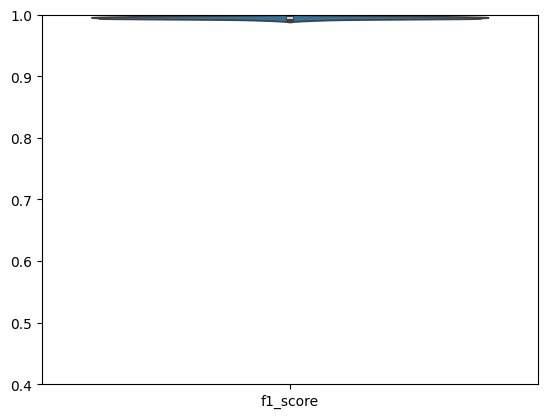

In [ ]:

metrics = ['precision', 'recall', 'f1_score', 'accuracy']
ax = sns.violinplot(data=[denv['f1_score']])
ax.set_ylim([0.4,1])


<Axes: >

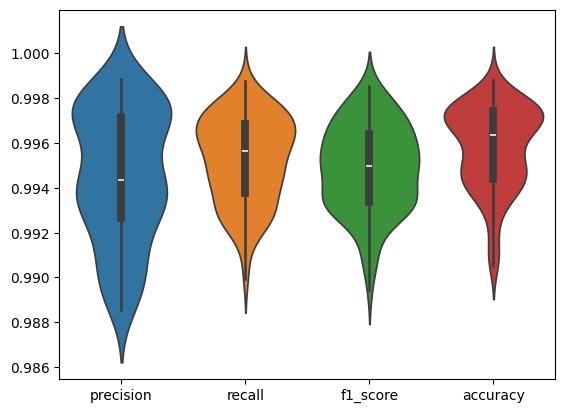

In [9]:
sns.violinplot(denv[metrics])

/tmp/ipykernel_12033/2006939136.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Precision', 'Recall', 'F1-Score', 'Accuracy'])


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

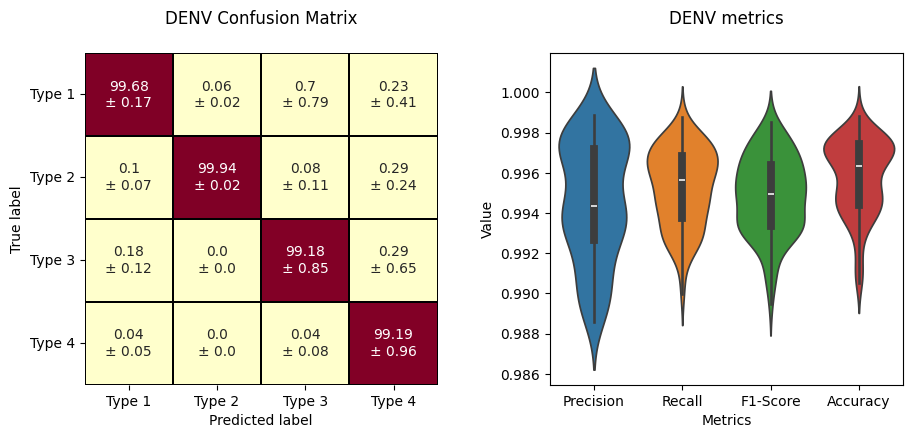

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=5.0)

classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']


sns.heatmap(ax=axes[0],
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

sns.violinplot(ax=axes[1],
               data=denv[metrics])

# Titles
axes[0].set_title("DENV Confusion Matrix\n")
axes[1].set_title("DENV metrics\n")

# X ticks labels
axes[0].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])
axes[1].set_xticklabels(['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# X and Y Labels
axes[0].set_ylabel("True label")
axes[0].set_xlabel("Predicted label")
axes[1].set_ylabel("Value")
axes[1].set_xlabel("Metrics")

# Y ticks labels
axes[0].yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)
